<a href="https://colab.research.google.com/github/AdvaySharma147/College_Experiments/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step function for perceptron
def step_function(x):
    return 1 if x > 0 else 0

# Perceptron function with activation
def perceptron(x1, x2, target, w1, w2, b, lr):
    y = step_function(w1 * x1 + w2 * x2 + b)  # Perceptron output using step function
    error = target - y  # Error calculation
    w1 += lr * error * x1  # Update weight for x1
    w2 += lr * error * x2  # Update weight for x2
    b += lr * error  # Update bias
    return y, w1, w2, b  # Return output, updated weights, and bias

# Function to train the perceptron for a gate
def train_gate(inputs, targets, epochs=500, lr=0.01):
    w1, w2, b = 0.0, 0.0, 0.0  # Initial weights and bias
    for _ in range(epochs):
        for (x1, x2), target in zip(inputs, targets):
            _, w1, w2, b = perceptron(x1, x2, target, w1, w2, b, lr)
    return w1, w2, b

# Modified NOT gate training (only one input per sample)
def train_not_gate(inputs, targets, epochs=500, lr=0.01):
    w1, b = 0.0, 0.0  # Initial weight and bias for one input
    for _ in range(epochs):
        for (x1,), target in zip(inputs, targets):  # Handle single input
            _, w1, _, b = perceptron(x1, 0, target, w1, 0, b, lr)  # Only one input, x2 is 0
    return w1, b

# Shared inputs for AND, OR, NAND, NOR gates
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Targets for different gates
and_targets = [0, 0, 0, 1]
or_targets = [0, 1, 1, 1]
nand_targets = [1, 1, 1, 0]
nor_targets = [1, 0, 0, 0]

# Corrected NOT gate inputs (one input)
not_inputs = [(0,), (1,)]  # NOT gate takes one input
not_targets = [1, 0]

# Train each gate and display weights and biases
print("AND Gate:", train_gate(inputs, and_targets))
print("OR Gate:", train_gate(inputs, or_targets))
print("NAND Gate:", train_gate(inputs, nand_targets))
print("NOR Gate:", train_gate(inputs, nor_targets))
print("NOT Gate:", train_not_gate(not_inputs, not_targets))  # ONLY for NOT gate

AND Gate: (0.02, 0.01, -0.02)
OR Gate: (0.01, 0.01, 0.0)
NAND Gate: (-0.02, -0.01, 0.03)
NOR Gate: (-0.01, -0.01, 0.01)
NOT Gate: (-0.01, 0.01)


# Experiment 1

**AND**

In [ ]:
# Define the Step function (activation function)
def Step_fun(y_in):
    return 1 if y_in >= 0 else 0

# Define the perceptron function
def perceptron(x, w, b):
    y_in = sum(x[i] * w[i] for i in range(len(w))) + b  # Weighted sum + bias
    return Step_fun(y_in)  # Pass through Step function

# Define basic gates
def AND_fun(x): return perceptron(x, [1, 1], -2)  # Weights: [1, 1], Bias: -2
def OR_fun(x): return perceptron(x, [1, 1], -0.5)  # Weights: [1, 1], Bias: -0.5
def NOT_fun(x): return perceptron(x, [-1], 0.5)  # Weight: -1, Bias: 0.5
def NOR_fun(x): return perceptron(x, [-1, -1], 0.5)  # Weights: [-1, -1], Bias: 0.5
def NAND_fun(x): return perceptron(x, [-1, -1], 1.5)  # Weights: [-1, -1], Bias: 1.5

# Define XOR gate using other gates
def XOR_fun(x):
    a, b = x  # Input split
    return OR_fun([AND_fun([a, NOT_fun([b])]), AND_fun([NOT_fun([a]), b])])

# Test cases
test_2_input = [[0, 0], [0, 1], [1, 0], [1, 1]]
test_1_input = [[0], [1]]

print("AND Gate:", [AND_fun(x) for x in test_2_input])
print("OR Gate:", [OR_fun(x) for x in test_2_input])
print("NOT Gate:", [NOT_fun(x) for x in test_1_input])
print("NOR Gate:", [NOR_fun(x) for x in test_2_input])
print("NAND Gate:", [NAND_fun(x) for x in test_2_input])
print("XOR Gate:", [XOR_fun(x) for x in test_2_input])

# Final weights and biases
print("\nFinal Parameters:")
print("AND gate - Weights: [1, 1], Bias: -2")
print("OR gate - Weights: [1, 1], Bias: -0.5")
print("NOT gate - Weight: [-1], Bias: 0.5")
print("NOR gate - Weights: [-1, -1], Bias: 0.5")
print("NAND gate - Weights: [-1, -1], Bias: 1.5")
print("XOR gate - Combination of other gates")


AND Gate: [0, 0, 0, 1]
OR Gate: [0, 1, 1, 1]
NOT Gate: [1, 0]
NOR Gate: [1, 0, 0, 0]
NAND Gate: [1, 1, 1, 0]
XOR Gate: [0, 1, 1, 0]

Final Parameters:
AND gate - Weights: [1, 1], Bias: -2
OR gate - Weights: [1, 1], Bias: -0.5
NOT gate - Weight: [-1], Bias: 0.5
NOR gate - Weights: [-1, -1], Bias: 0.5
NAND gate - Weights: [-1, -1], Bias: 1.5
XOR gate - Combination of other gates


In [ ]:
def Step_fun(y_in):
  if y_in >= 0:
    return 1
  else:
    return 0

In [ ]:
import numpy as np
def perceptron(x,w,b):
  y_in = np.dot(x,w) + b
  y_hat = Step_fun(y_in)
  return y_hat

In [ ]:
def AND_fun(x):
  w = np.array([1,1])
  b = -2
  y_hat = perceptron(x,w,b)
  return y_hat

In [ ]:
test = np.array([[0,0],[0,1],[1,0],[1,1]])
for x in test:
  print(AND_fun(x))

0
0
0
1


**OR**

In [ ]:
def OR_fun(x):
  w = np.array([1,1])
  b = -0.5
  y_hat = perceptron(x,w,b)
  return y_hat

In [ ]:
test = np.array([[0,0],[0,1],[1,0],[1,1]])
for x in test:
  print(OR_fun(x))

0
1
1
1


**NOT**

In [ ]:
def NOT_fun(x):
  w = -1
  b = 0.5
  y_hat = perceptron(x,w,b)
  return y_hat

In [ ]:
test = np.array([[0],[1]])
for x in test:
  print(NOT_fun(x))

1
0


**NOR**

In [ ]:
def NOR_fun(x):
  w = np.array([-1,-1])
  b = 0.5
  y_hat = perceptron(x,w,b)
  return y_hat

In [ ]:
test = np.array([[0,0],[0,1],[1,0],[1,1]])
for x in test:
  print(NOR_fun(x))

1
0
0
0


**NAND**

In [ ]:
def NAND_fun(x):
  w = np.array([-1,-1])
  b = 1.5
  y_hat = perceptron(x,w,b)
  return y_hat

In [ ]:
test = np.array([[0,0],[0,1],[1,0],[1,1]])
for x in test:
  print(NAND_fun(x))

1
1
1
0


**XOR**

In [ ]:
def XOR_fun(x):
    a, b = x
    not_a = NOT_fun([a])
    not_b = NOT_fun([b])

    and1 = AND_fun([a, not_b])
    and2 = AND_fun([not_a, b])

    xor = OR_fun([and1, and2])
    return xor

In [ ]:
test = np.array([[0,0],[0,1],[1,0],[1,1]])
for x in test:
  print(XOR_fun(x))

0
1
1
0


In [ ]:
# Final weights and biases
print("AND gate - Weights: [1, 1], Bias: -2")
print("OR gate - Weights: [1, 1], Bias: -0.5")
print("NOT gate - Weight: -1, Bias: 0.5")
print("NOR gate - Weights: [-1, -1], Bias: 0.5")
print("NAND gate - Weights: [-1, -1], Bias: 1.5")
print("XOR gate - Combination of other gates")

AND gate - Weights: [1, 1], Bias: -2
OR gate - Weights: [1, 1], Bias: -0.5
NOT gate - Weight: -1, Bias: 0.5
NOR gate - Weights: [-1, -1], Bias: 0.5
NAND gate - Weights: [-1, -1], Bias: 1.5
XOR gate - Combination of other gates


# Experiment 2

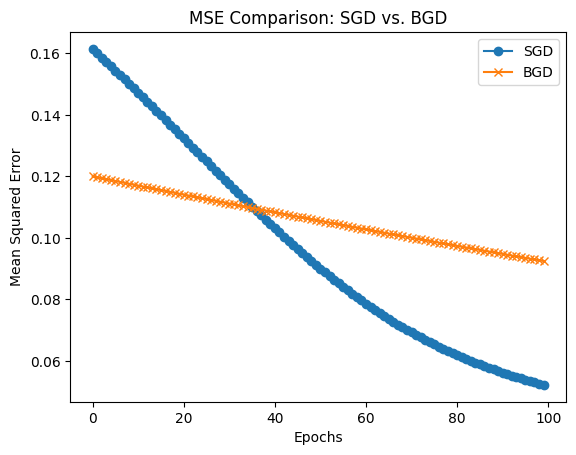

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation and perceptron functions
def sigmoid(y_in): return 1 / (1 + np.exp(-y_in))
def perceptron(x, w, b): return np.dot(x, w) + b

# Generic Gradient Descent (supporting SGD and BGD)
def gradient_descent(X, Y, epochs, lr=0.1, method="batch"):
    w, b, loss_arr = np.random.randn(), np.random.randn(), []
    for _ in range(epochs):
        if method == "batch":  # Batch GD
            y_net = sigmoid(perceptron(np.array(X), w, b))
            dw, db = lr * np.mean((Y - y_net) * y_net * (1 - y_net) * np.array(X)), lr * np.mean((Y - y_net) * y_net * (1 - y_net))
        else:  # Stochastic GD
            dw, db, loss = 0, 0, 0
            for x, y in zip(X, Y):
                y_net = sigmoid(perceptron(x, w, b))
                dw += lr * (y - y_net) * y_net * (1 - y_net) * x
                db += lr * (y - y_net) * y_net * (1 - y_net)
        w, b = w + dw, b + db
        loss_arr.append(np.mean((Y - sigmoid(perceptron(np.array(X), w, b))) ** 2))
    return w, b, loss_arr

# Main Execution
X, Y, epochs = [0.5, 2.5], [0.2, 0.9], 100

# Perform Batch GD and plot Error Surface
w_bgd, b_bgd, loss_bgd = gradient_descent(X, Y, epochs, method="batch")

# Perform Stochastic GD
_, _, loss_sgd = gradient_descent(X, Y, epochs, method="stochastic")

# Loss Comparison Plot
plt.plot(loss_sgd, label='SGD', marker='o')
plt.plot(loss_bgd, label='BGD', marker='x')
plt.title('MSE Comparison: SGD vs. BGD')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
for i in range(len(loss_sgd)):
    print(f"Epoch {i+1}: SGD Loss = {loss_sgd[i]}, BGD Loss = {loss_bgd[i]}")

Epoch 1: SGD Loss = 0.1614224705147983, BGD Loss = 0.10307813681845986
Epoch 2: SGD Loss = 0.1600284437993781, BGD Loss = 0.1023776788153135
Epoch 3: SGD Loss = 0.15862603939305236, BGD Loss = 0.10167882272463821
Epoch 4: SGD Loss = 0.1572155229419998, BGD Loss = 0.10098161541135363
Epoch 5: SGD Loss = 0.15579717461251116, BGD Loss = 0.1002861034523852
Epoch 6: SGD Loss = 0.1543712893173884, BGD Loss = 0.09959233312383474
Epoch 7: SGD Loss = 0.15293817692372064, BGD Loss = 0.09890035038836982
Epoch 8: SGD Loss = 0.1514981624401842, BGD Loss = 0.09821020088283891
Epoch 9: SGD Loss = 0.15005158618192807, BGD Loss = 0.09752192990611949
Epoch 10: SGD Loss = 0.14859880391102262, BGD Loss = 0.09683558240720637
Epoch 11: SGD Loss = 0.14714018695036232, BGD Loss = 0.09615120297354524
Epoch 12: SGD Loss = 0.1456761222688274, BGD Loss = 0.09546883581961849
Epoch 13: SGD Loss = 0.14420701253542825, BGD Loss = 0.09478852477578786
Epoch 14: SGD Loss = 0.1427332761400659, BGD Loss = 0.09411031327739

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(y_in):
    return (1/(1+np.exp(-1*y_in)))

In [ ]:
def perceptron(x,w,b):
    y_in=np.dot(x,w) + b
    return y_in

In [ ]:
# print(np.exp(1))
def gradient_descent(X,Y,ep):
    w=0
    w_arr=[w]
    b=0
    b_arr=[b]
    epoch=ep
    c=0.1
    lr=1
    loss_arr= []
    for i in range(epoch):
        dw,db,loss=0,0,0
        for x,y in zip(X,Y):
            y_in= perceptron(x,w,b)
            y_net=sigmoid(y_in)
            dw = c * (y-y_net) * y_net * (1-y_net)  * x
            db = c * (y-y_net) * y_net * (1-y_net)
            w = w + (lr*dw)
            b = b + (lr*db)
            loss += (y-y_net)
        w_arr.append(w)
        b_arr.append(b)
        loss_arr.append(loss)
    return  w,b,w_arr,b_arr,loss_arr

In [ ]:
X=[0.5,2.5]
Y=[0.2,0.9]
Epoch=100
w,b,warr,barr,lossarr=gradient_descent(X,Y,Epoch)
print(w,b)

0.6265092971730045 -0.3794173743820606


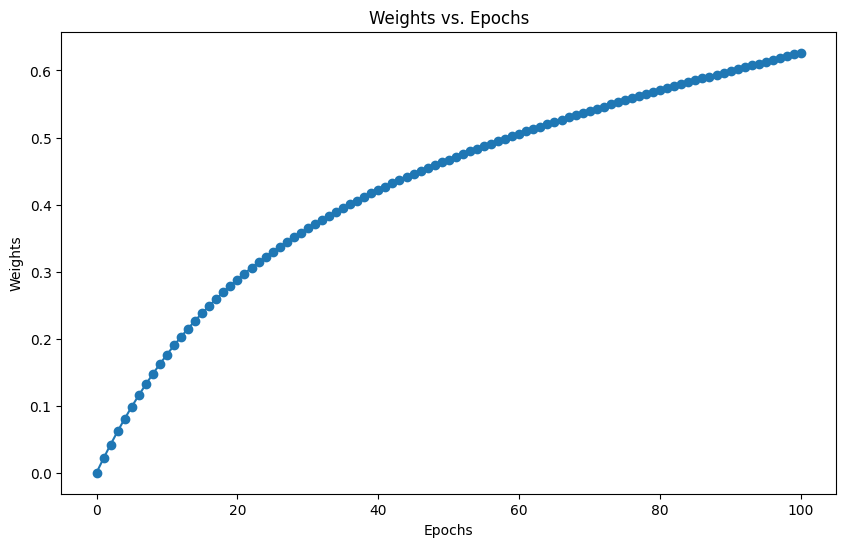

In [ ]:
Epochs = list(range(0,Epoch+1))
plt.figure(figsize=(10, 6))
plt.plot(Epochs, warr, marker='o', linestyle='-')
plt.title('Weights vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.show()

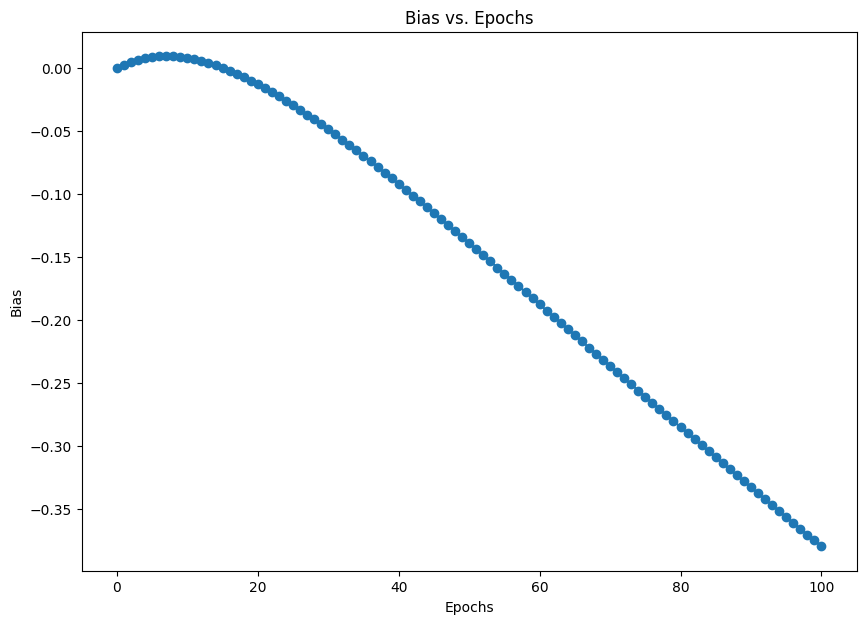

In [ ]:
Epochs = list(range(0,Epoch+1))
plt.figure(figsize=(10, 7))
plt.plot(Epochs, barr, marker='o', linestyle='-')
plt.title('Bias vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Bias')
plt.show()

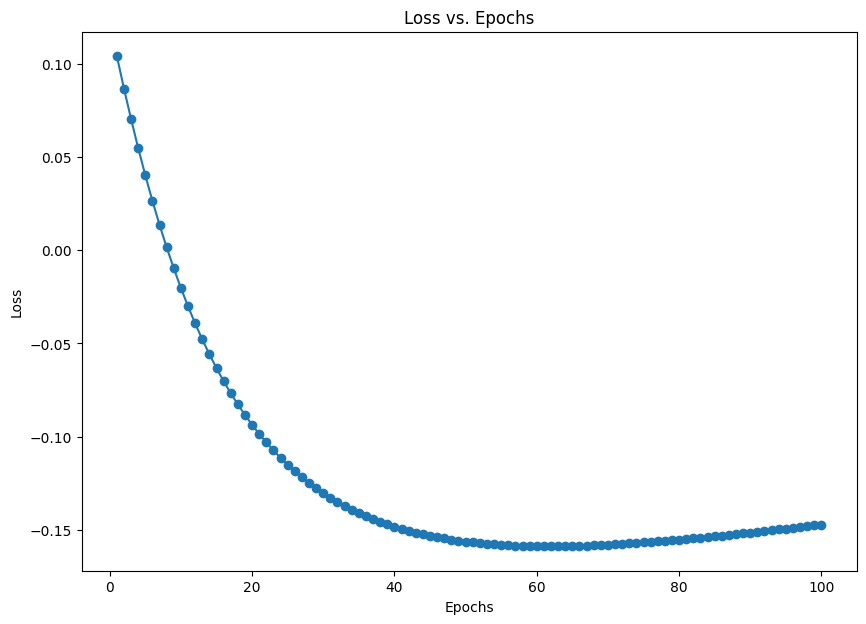

In [ ]:
Epochs = list(range(1,Epoch+1))
plt.figure(figsize=(10, 7))
plt.plot(Epochs, lossarr, marker='o', linestyle='-')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
def initialize_parameters(input_dim):
    w = np.random.randn(input_dim)
    b = np.random.randn()
    return w, b
input_dim = len(X)  # number of input features
w, b = initialize_parameters(input_dim)
print("Weight:",w)
print("Bias:",b)

Weight: [ 0.34059719 -0.0406429 ]
Bias: -0.49756024331932897


In [ ]:
def mean_squared_error(Y, Y_pred):
    return np.mean((Y - Y_pred) ** 2)

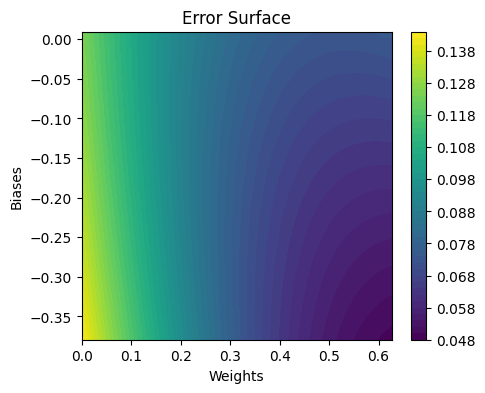

In [ ]:
def plot_error_surface(X, Y, w_arr, b_arr, loss_arr):
    W, B = np.meshgrid(np.linspace(min(w_arr), max(w_arr), 100),
                       np.linspace(min(b_arr), max(b_arr), 100))
    Loss = np.zeros(W.shape)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            Y_pred = sigmoid(np.dot(X, W[i, j]) + B[i, j])
            Loss[i, j] = mean_squared_error(Y, Y_pred)
    plt.figure(figsize=(5, 4))
    plt.contourf(W, B, Loss, levels=50, cmap='viridis')
    plt.colorbar()
    plt.title('Error Surface')
    plt.xlabel('Weights')
    plt.ylabel('Biases')
    plt.show()
plot_error_surface(X, Y, warr, barr, lossarr)

In [ ]:
def stochastic_gradient_descent(X, Y, epochs):
    w, b = initialize_parameters(len(X))
    lr = 0.01
    loss_arr = []
    for epoch in range(epochs):
        for i in range(len(X)):
            xi, yi = X[i], Y[i]
            y_in = perceptron(xi, w, b)
            y_net = sigmoid(y_in)
            dw = (yi - y_net) * y_net * (1 - y_net) * xi
            db = (yi - y_net) * y_net * (1 - y_net)
            w += lr * dw
            b += lr * db
        loss = mean_squared_error(Y, sigmoid(np.dot(X, w) + b))
        loss_arr.append(loss)
    return w, b, loss_arr
w_sgd, b_sgd, loss_sgd = stochastic_gradient_descent(X, Y, Epoch)

In [ ]:
def batch_gradient_descent(X, Y, epochs):
    w, b = initialize_parameters(len(X))
    lr = 0.01
    loss_arr = []
    for epoch in range(epochs):
        y_in = perceptron(X, w, b)
        y_net = sigmoid(y_in)
        dw = np.mean((Y - y_net) * y_net * (1 - y_net) * X, axis=0)
        db = np.mean((Y - y_net) * y_net * (1 - y_net))
        w += lr * dw
        b += lr * db
        loss = mean_squared_error(Y, y_net)
        loss_arr.append(loss)
    return w, b, loss_arr
w_batch, b_batch, loss_batch = batch_gradient_descent(X, Y, Epoch)

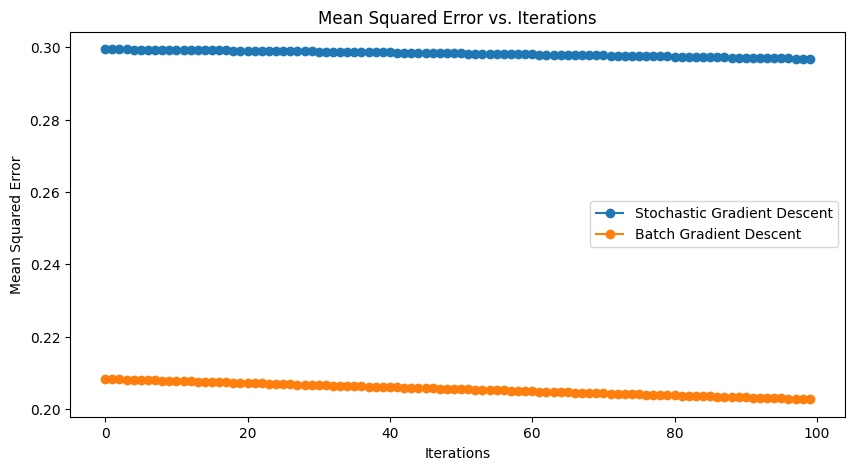

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(loss_sgd, marker='o', linestyle='-', label='Stochastic Gradient Descent')
plt.plot(loss_batch, marker='o', linestyle='-', label='Batch Gradient Descent')
plt.title('Mean Squared Error vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Train Acc: 0.97 | Test Acc: 0.98


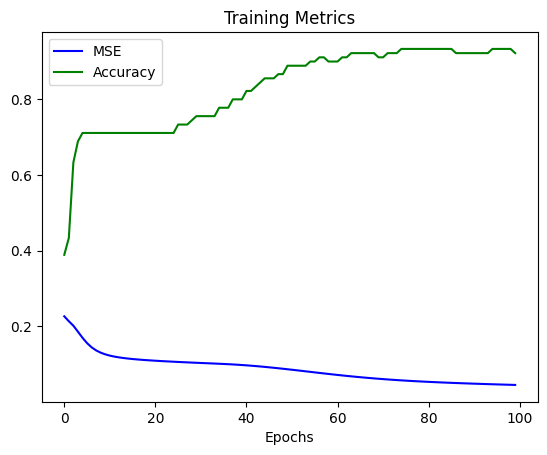

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Sigmoid functions and weight initialization
sigmoid = lambda x: 1 / (1 + np.exp(-x))  # Sigmoid activation
sigmoid_derivative = lambda x: x * (1 - x)  # Derivative for backpropagation
init_weights = lambda i, h, o: (np.random.rand(h, i + 1) - 0.5, np.random.rand(o, h + 1) - 0.5)  # Random weights

# Forward propagation
def forward(x, w1, w2):
    x = np.append(1, x)  # Add bias to input
    h = np.append(1, sigmoid(np.dot(w1, x)))  # Compute hidden layer output
    o = sigmoid(np.dot(w2, h))  # Compute final output
    return x, h, o

# Backward propagation
def backward(x, y, w1, w2, h, o, lr):
    oe = y - o  # Output error
    he = np.dot(w2[:, 1:].T, oe * sigmoid_derivative(o))  # Hidden layer error
    w2 += lr * np.outer(oe * sigmoid_derivative(o), h)  # Update weights from hidden to output
    w1 += lr * np.outer(he * sigmoid_derivative(h[1:]), x)  # Update weights from input to hidden
    return w1, w2

# Train the neural network
def train(X, Y, w1, w2, lr, epochs):
    mse, acc = [], []  # Track mean squared error and accuracy
    for _ in range(epochs):  # Loop through epochs
        e_mse, correct = 0, 0  # Initialize metrics
        for x, y in zip(X, Y):  # For each sample
            x, h, o = forward(x, w1, w2)  # Forward pass
            w1, w2 = backward(x, y, w1, w2, h, o, lr)  # Backward pass
            e_mse += np.mean((y - o) ** 2)  # Accumulate MSE
            correct += np.argmax(o) == np.argmax(y)  # Count correct predictions
        mse.append(e_mse / len(X))  # Average MSE
        acc.append(correct / len(X))  # Accuracy
    return w1, w2, mse, acc

# Calculate accuracy
def accuracy(X, Y, w1, w2):
    return sum(np.argmax(forward(x, w1, w2)[2]) == np.argmax(y) for x, y in zip(X, Y)) / len(X)

# Plot MSE and accuracy
def plot_metrics(mse, acc):
    plt.plot(mse, label="MSE", color="blue")  # Plot MSE
    plt.plot(acc, label="Accuracy", color="green")  # Plot accuracy
    plt.legend(), plt.xlabel("Epochs"), plt.title("Training Metrics"), plt.show()  # Add labels and title

# Load data and preprocess
data = pd.read_csv("/content/drive/MyDrive/IRIS.csv")
X = data.iloc[:, :-1].values  # Input features
Y = OneHotEncoder(sparse_output=False).fit_transform(data.iloc[:, -1].values.reshape(-1, 1))  # One-hot labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)  # Split into train and test

# Initialize weights and train
w1, w2 = init_weights(4, 5, 3)  # Initialize weights for layers
w1, w2, mse, acc = train(X_train, Y_train, w1, w2, lr=0.1, epochs=100)  # Train the model

# Evaluate and plot
print(f"Train Acc: {accuracy(X_train, Y_train, w1, w2):.2f} | Test Acc: {accuracy(X_test, Y_test, w1, w2):.2f}")
plot_metrics(mse, acc)  # Plot metrics


# Experiment 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Initialize weights
def InitializeWeights(nodes):
    layers, weights = len(nodes), []
    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for _ in range(nodes[i-1] + 1)] for _ in range(nodes[i])]
        weights.append(np.matrix(w))
    return weights

In [ ]:
# Sigmoid and its derivative
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))
def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

In [ ]:
# Forward propagation
def ForwardPropagation(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation)
    return activations

In [ ]:
# Prediction function
def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item)
    activations = ForwardPropagation(item, weights, layers)
    outputFinal = activations[-1].A1
    index = np.argmax(outputFinal)
    y = [0 for _ in range(len(outputFinal))]
    y[index] = 1
    return y

In [ ]:
# Accuracy calculation
def Accuracy(X, Y, weights):
    correct = 0
    for i in range(len(X)):
        guess = Predict(X[i], weights)
        if list(Y[i]) == guess:
            correct += 1
    return correct / len(X)

In [ ]:
# Backpropagation
def BackPropagation(y, activations, weights, layers, lr):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal)
    for j in range(layers, 0, -1):
        currActivation = activations[j]
        prevActivation = np.append(1, activations[j-1]) if j > 1 else activations[0]
        delta = np.multiply(error, SigmoidDerivative(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)
        w = np.delete(weights[j-1], [0], axis=1)
        error = np.dot(delta, w)
    return weights

In [ ]:
# Training function
def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x))
        activations = ForwardPropagation(x, weights, layers)
        weights = BackPropagation(y, activations, weights, layers, lr)
    return weights

In [ ]:
# Neural network function
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=100, nodes=[], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = InitializeWeights(nodes)
    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)
        if epoch % 20 == 0:
            print(f"Epoch {epoch}")
            print(f"Training Accuracy: {Accuracy(X_train, Y_train, weights)}")
            if X_val is not None:
                print(f"Validation Accuracy: {Accuracy(X_val, Y_val, weights)}")
    return weights

In [ ]:
# Mean Squared Error calculation
def MeanSquaredError(X, Y, weights):
    error = 0
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x))
        activations = ForwardPropagation(x, weights, len(weights))
        outputFinal = activations[-1].A1
        error += np.sum((y - outputFinal) ** 2)
    return error / (2 * len(X))

In [ ]:
# Load and preprocess Iris dataset
iris = pd.read_csv("/content/drive/MyDrive/Iris.csv")
iris = iris.sample(frac=1).reset_index(drop=True)

In [ ]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.array(X)

In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
Y = iris.Species
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.35)

In [ ]:
epochs = 100
nodes = [len(X[0]), 5, 10, len(Y[0])]
lr = 0.12

In [ ]:
weights = NeuralNetwork(X_train, Y_train, X_val, Y_val, epochs=epochs, nodes=nodes, lr=lr)

Epoch 20
Training Accuracy: 0.8448275862068966
Validation Accuracy: 0.875
Epoch 40
Training Accuracy: 1.0
Validation Accuracy: 1.0
Epoch 60
Training Accuracy: 1.0
Validation Accuracy: 1.0
Epoch 80
Training Accuracy: 1.0
Validation Accuracy: 0.96875
Epoch 100
Training Accuracy: 0.9827586206896551
Validation Accuracy: 0.96875


In [ ]:
# Error surface plotting function
def PlotErrorSurface(weights, X_train, Y_train):
    bias_range = np.linspace(-1, 1, 30)
    weight_range = np.linspace(-1, 1, 30)
    B, W = np.meshgrid(bias_range, weight_range)
    mse_surface = np.zeros(B.shape)
    for i in range(B.shape[0]):
        for j in range(W.shape[1]):
            adjusted_weights = weights.copy()
            adjusted_weights[0][0, 0] = B[i, j]
            adjusted_weights[0][0, 1] = W[i, j]
            mse_surface[i, j] = MeanSquaredError(X_train, Y_train, adjusted_weights)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(B, W, mse_surface, cmap='viridis')
    ax.set_xlabel('Bias')
    ax.set_ylabel('Weights')
    ax.set_zlabel('MSE')
    plt.title('Error Surface')
    plt.show()

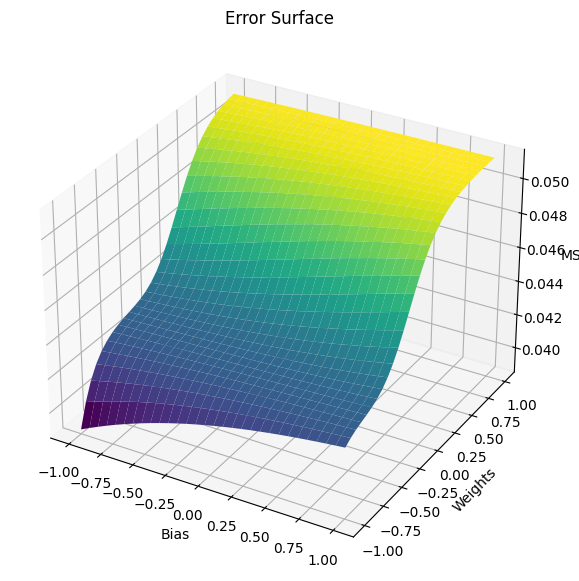

In [ ]:
# Plotting error surface
PlotErrorSurface(weights, X_train, Y_train)

In [ ]:
# Plot MSE and accuracy over epochs
mse_values, accuracy_values = [], []

In [ ]:
for epoch in range(1, epochs+1):
    weights = Train(X_train, Y_train, lr, weights)
    mse = MeanSquaredError(X_train, Y_train, weights)
    mse_values.append(mse)
    accuracy = Accuracy(X_train, Y_train, weights)
    accuracy_values.append(accuracy)

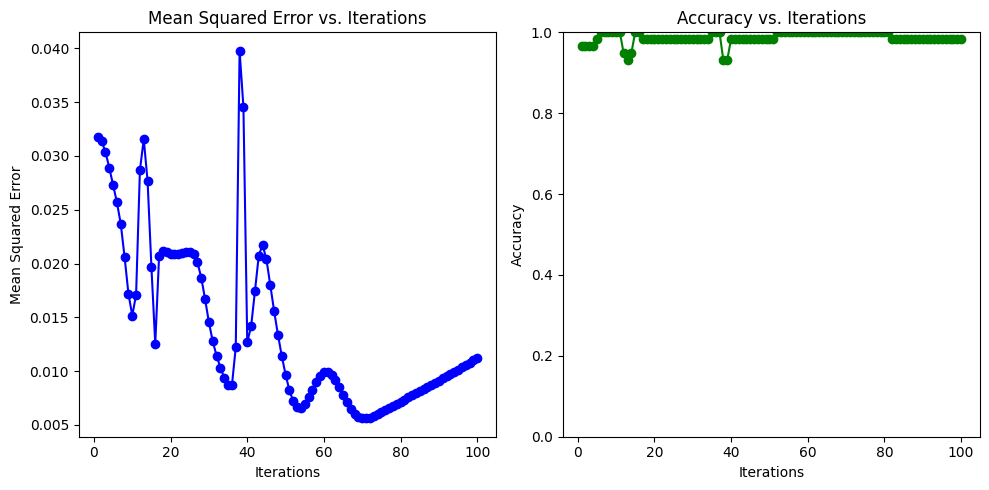

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, marker='o', linestyle='-', color='g')
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)

plt.tight_layout()
plt.show()

In [ ]:
# Testing accuracy
testing_accuracy = Accuracy(X_test, Y_test, weights)
print(f"Testing Accuracy: {testing_accuracy}")

Testing Accuracy: 0.9333333333333333


In [ ]:
# Neural Network Diagram
import networkx as nx

In [ ]:
def DrawNeuralNetwork(input_size, hidden_size, output_size):
    G = nx.DiGraph()
    pos = {}
    # Input layer
    for i in range(input_size):
        G.add_node(('input', i), pos=(0, i))
        pos[('input', i)] = (0, input_size / 2 - i)
    # Hidden layer
    for i in range(hidden_size):
        G.add_node(('hidden', i), pos=(1, i))
        pos[('hidden', i)] = (1, hidden_size / 2 - i)
        for j in range(input_size):
            G.add_edge(('input', j), ('hidden', i))
    # Output layer
    for i in range(output_size):
        G.add_node(('output', i), pos=(2, i))
        pos[('output', i)] = (2, output_size / 2 - i)
        for j in range(hidden_size):
            G.add_edge(('hidden', j), ('output', i))
    nx.draw(G, pos, with_labels=False, node_size=700, node_color='skyblue', edge_color='gray', width=2)
    plt.title('Neural Network Architecture')
    plt.show()

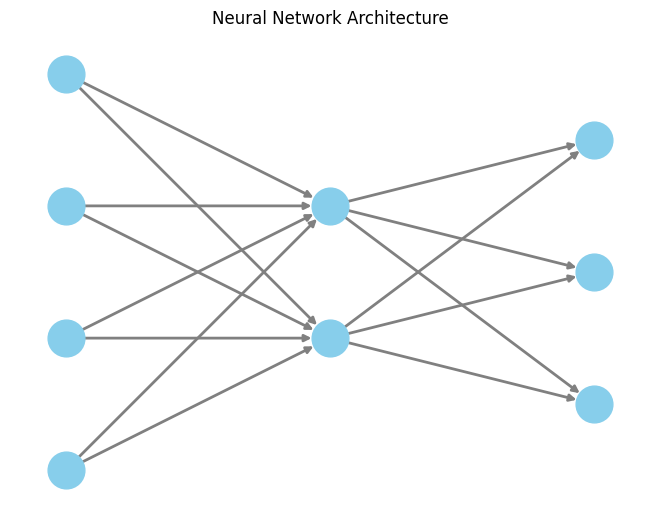

In [ ]:
# Example usage:
input_size = 4
hidden_size = 2
output_size = 3
DrawNeuralNetwork(input_size, hidden_size, output_size)

Train Acc: 0.92 | Test Acc: 0.95


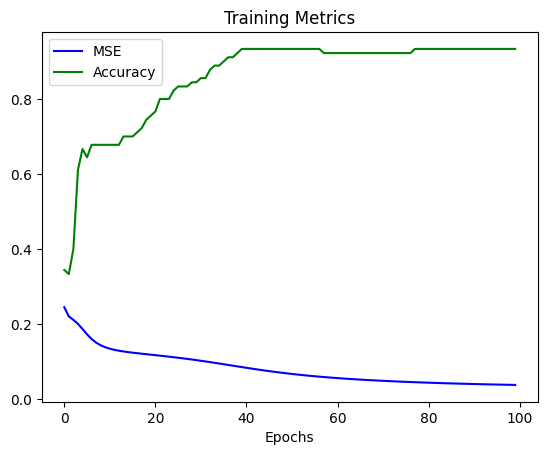

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Functions for sigmoid and weight initialization
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_derivative = lambda x: x * (1 - x)
init_weights = lambda i, h, o: (np.random.rand(h, i + 1) - 0.5, np.random.rand(o, h + 1) - 0.5)

# Forward and Backward propagation
def forward(x, w1, w2):
    x = np.append(1, x)
    h = np.append(1, sigmoid(np.dot(w1, x)))
    o = sigmoid(np.dot(w2, h))
    return x, h, o

def backward(x, y, w1, w2, h, o, lr):
    oe = y - o
    he = np.dot(w2[:, 1:].T, oe * sigmoid_derivative(o))
    w2 += lr * np.outer(oe * sigmoid_derivative(o), h)
    w1 += lr * np.outer(he * sigmoid_derivative(h[1:]), x)
    return w1, w2

# Training with metric tracking
def train(X, Y, w1, w2, lr, epochs):
    mse, acc = [], []
    for _ in range(epochs):
        e_mse, correct = 0, 0
        for x, y in zip(X, Y):
            x, h, o = forward(x, w1, w2)
            w1, w2 = backward(x, y, w1, w2, h, o, lr)
            e_mse += np.mean((y - o) ** 2)
            correct += np.argmax(o) == np.argmax(y)
        mse.append(e_mse / len(X))
        acc.append(correct / len(X))
    return w1, w2, mse, acc

# Accuracy and plotting
def accuracy(X, Y, w1, w2):
    return sum(np.argmax(forward(x, w1, w2)[2]) == np.argmax(y) for x, y in zip(X, Y)) / len(X)

def plot_metrics(mse, acc):
    plt.plot(mse, label="MSE", color="blue")
    plt.plot(acc, label="Accuracy", color="green")
    plt.legend(), plt.xlabel("Epochs"), plt.title("Training Metrics"), plt.show()

# Load data, preprocess, and split
data = pd.read_csv("/content/IRIS.csv")
X = data.iloc[:, :-1].values
Y = OneHotEncoder(sparse_output=False).fit_transform(data.iloc[:, -1].values.reshape(-1, 1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

# Train and evaluate
w1, w2 = init_weights(4, 5, 3)
w1, w2, mse, acc = train(X_train, Y_train, w1, w2, lr=0.1, epochs=100)
print(f"Train Acc: {accuracy(X_train, Y_train, w1, w2):.2f} | Test Acc: {accuracy(X_test, Y_test, w1, w2):.2f}")
plot_metrics(mse, acc)


# Experiment 4

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 32202872.10it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1076130.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8702901.72it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2389380.25it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

In [ ]:
class ImprovedNN(nn.Module):
    def __init__(self):
        super(ImprovedNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Increased number of neurons
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
# Initialize the improved model
model = ImprovedNN()

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)

In [ ]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

In [ ]:
def evaluate(model, test_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            # Get predictions
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return running_loss / len(test_loader), accuracy

In [ ]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

ImprovedNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
# Define loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
# List of optimizers to be tested with adjusted learning rate for SGD with momentum
optimizers = {
    'SGD': lambda params: optim.SGD(params, lr=0.1),  # Keep learning rate at 0.1
    'SGD with momentum': lambda params: optim.SGD(params, lr=0.01, momentum=0.9),  # Reduced learning rate to 0.01
    'Mini-batch SGD': lambda params: optim.SGD(params, lr=0.1),
    'Adagrad': lambda params: optim.Adagrad(params, lr=0.01),
    'RMSprop': lambda params: optim.RMSprop(params, lr=0.001),
    'AdaDelta': lambda params: optim.Adadelta(params, lr=1.0),
    'Adam': lambda params: optim.Adam(params, lr=0.001)
}

In [ ]:
# Training loop with the updated optimizers
num_epochs = 5  # Number of epochs is 5 as specified
results = {}

In [ ]:
for opt_name, optimizer_func in optimizers.items():
    print(f'Training with {opt_name} optimizer...')
    model = ImprovedNN().to(device)  # Reinitialize the model for each optimizer
    model.apply(init_weights)  # Reinitialize weights
    optimizer = optimizer_func(model.parameters())
    train_losses = []
    test_losses = []
    test_accuracies = []
    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    results[opt_name] = {
        'train_loss': train_losses,
        'test_loss': test_losses,
        'test_accuracy': test_accuracies
    }

Training with SGD optimizer...
Epoch [1/5] - Train Loss: 0.7616, Test Loss: 0.2899, Test Accuracy: 91.11%
Epoch [2/5] - Train Loss: 0.4135, Test Loss: 0.2321, Test Accuracy: 92.75%
Epoch [3/5] - Train Loss: 0.3427, Test Loss: 0.1829, Test Accuracy: 94.56%
Epoch [4/5] - Train Loss: 0.3035, Test Loss: 0.2101, Test Accuracy: 93.49%
Epoch [5/5] - Train Loss: 0.2794, Test Loss: 0.1660, Test Accuracy: 94.84%
Training with SGD with momentum optimizer...
Epoch [1/5] - Train Loss: 0.7818, Test Loss: 0.2823, Test Accuracy: 91.65%
Epoch [2/5] - Train Loss: 0.4421, Test Loss: 0.2159, Test Accuracy: 93.45%
Epoch [3/5] - Train Loss: 0.3753, Test Loss: 0.1940, Test Accuracy: 93.96%
Epoch [4/5] - Train Loss: 0.3331, Test Loss: 0.1772, Test Accuracy: 94.55%
Epoch [5/5] - Train Loss: 0.3006, Test Loss: 0.1627, Test Accuracy: 95.03%
Training with Mini-batch SGD optimizer...
Epoch [1/5] - Train Loss: 0.7539, Test Loss: 0.2737, Test Accuracy: 91.75%
Epoch [2/5] - Train Loss: 0.4152, Test Loss: 0.2269, Test

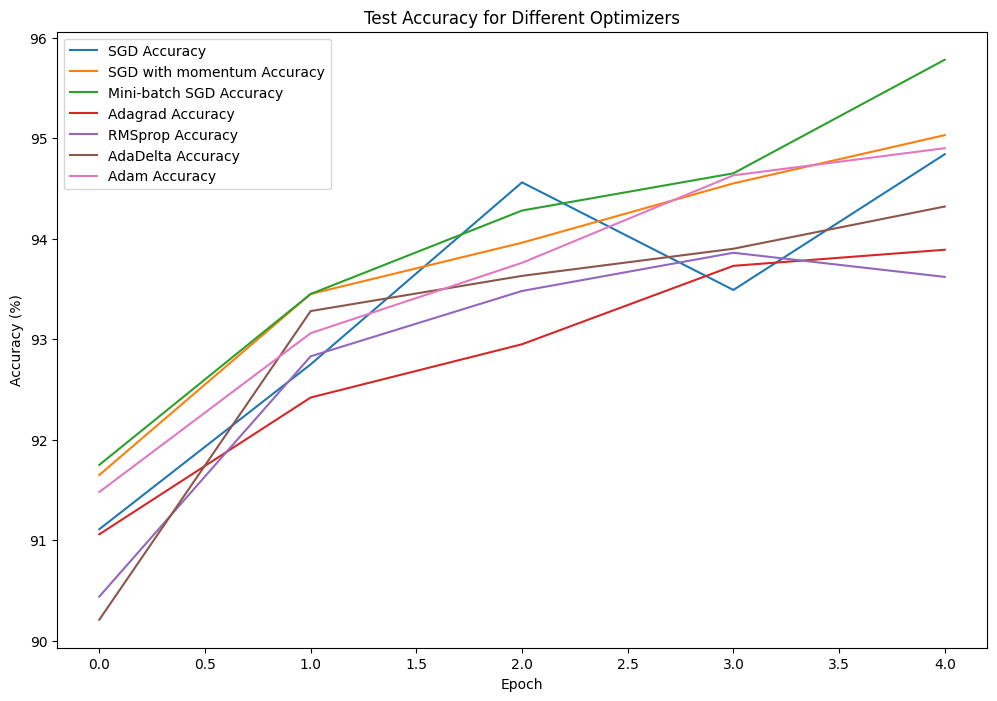

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 8))
for opt_name, result in results.items():
    plt.plot(result['test_accuracy'], label=f'{opt_name} Accuracy')
plt.title('Test Accuracy for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

Training with Gradient Descent optimizer...
Epoch 1/3 completed, Test Accuracy: 86.34%
Epoch 2/3 completed, Test Accuracy: 89.21%
Epoch 3/3 completed, Test Accuracy: 90.28%
Training with Stochastic GD optimizer...
Epoch 1/3 completed, Test Accuracy: 86.34%
Epoch 2/3 completed, Test Accuracy: 89.52%
Epoch 3/3 completed, Test Accuracy: 90.31%
Training with SGD + Momentum optimizer...
Epoch 1/3 completed, Test Accuracy: 92.56%
Epoch 2/3 completed, Test Accuracy: 94.25%
Epoch 3/3 completed, Test Accuracy: 95.52%
Training with Mini-Batch GD optimizer...
Epoch 1/3 completed, Test Accuracy: 86.26%
Epoch 2/3 completed, Test Accuracy: 89.24%
Epoch 3/3 completed, Test Accuracy: 90.08%
Training with Adagrad optimizer...
Epoch 1/3 completed, Test Accuracy: 93.88%
Epoch 2/3 completed, Test Accuracy: 94.90%
Epoch 3/3 completed, Test Accuracy: 95.52%
Training with RMSProp optimizer...
Epoch 1/3 completed, Test Accuracy: 94.38%
Epoch 2/3 completed, Test Accuracy: 93.57%
Epoch 3/3 completed, Test Accur

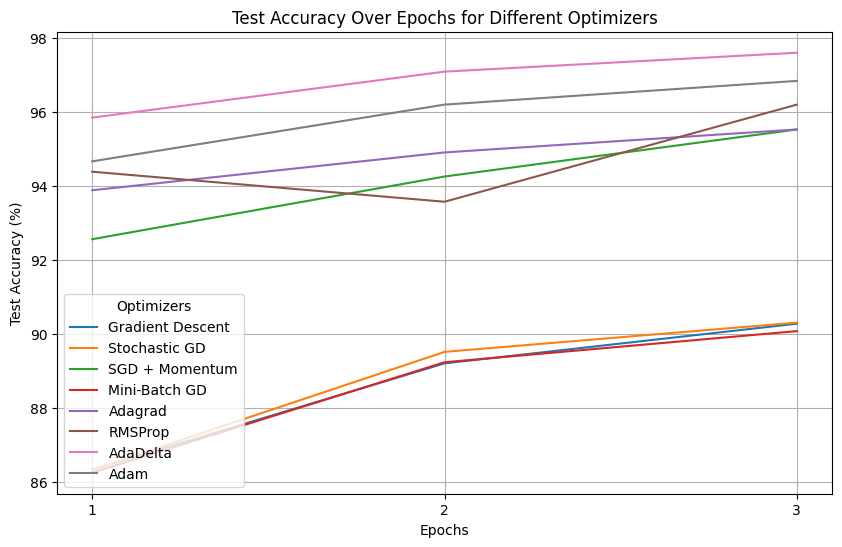

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data loading
transform = transforms.ToTensor()
train_loader = DataLoader(datasets.MNIST('./data', train=True, transform=transform, download=True), batch_size=64, shuffle=True)
test_loader = DataLoader(datasets.MNIST('./data', train=False, transform=transform, download=True), batch_size=1000)

# Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x.view(-1, 28 * 28)))
        return self.fc2(x)

# Training and evaluation function
def train_and_evaluate(optimizer_name, optimizer_fn, batch_size=64):
    print(f"Training with {optimizer_name} optimizer...")
    model = SimpleNN().to(device)
    optimizer = optimizer_fn(model.parameters())
    criterion = nn.CrossEntropyLoss()

    # Tracking accuracy over epochs
    accuracies = []

    for epoch in range(3):  # Train for 3 epochs
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            loss = criterion(model(x), y)
            loss.backward()
            optimizer.step()

        # Evaluate accuracy after each epoch
        correct = sum((model(x.to(device)).argmax(1) == y.to(device)).sum().item() for x, y in test_loader)
        accuracy = correct / len(test_loader.dataset) * 100
        accuracies.append(accuracy)
        print(f"Epoch {epoch + 1}/3 completed, Test Accuracy: {accuracy:.2f}%")

    return accuracies

# Optimizers
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
optimizers = {
    'Gradient Descent': lambda p: optim.SGD(p, lr=0.01),
    'Stochastic GD': lambda p: optim.SGD(p, lr=0.01),
    'SGD + Momentum': lambda p: optim.SGD(p, lr=0.01, momentum=0.9),
    'Mini-Batch GD': lambda p: optim.SGD(p, lr=0.01),
    'Adagrad': lambda p: optim.Adagrad(p, lr=0.01),
    'RMSProp': lambda p: optim.RMSprop(p, lr=0.01),
    'AdaDelta': lambda p: optim.Adadelta(p),
    'Adam': lambda p: optim.Adam(p, lr=0.001),
}

# Store accuracies for each optimizer
results = {name: train_and_evaluate(name, func, batch_size=(1 if name == 'Stochastic GD' else 64)) for name, func in optimizers.items()}

# Plotting test accuracies over epochs for all optimizers
plt.figure(figsize=(10, 6))

for name, accuracies in results.items():
    plt.plot(range(1, 4), accuracies, label=name)  # Plot for 3 epochs

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Over Epochs for Different Optimizers')
plt.legend(title='Optimizers')
plt.xticks(range(1, 4))
plt.grid(True)
plt.show()

# Experiment 5

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Reshape data to fit the CNN model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
# Normalize the pixel values to [0, 1] range
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Define a function to build the CNN model
def model_builder(hp):
    model = Sequential()
    # Input layer
    model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
    # First convolutional layer
    model.add(Conv2D(hp.Int('conv_1_filters', min_value=32, max_value=128, step=16),
                     kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    # Second convolutional layer
    model.add(Conv2D(hp.Int('conv_2_filters', min_value=32, max_value=128, step=16),
                     kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    # Flatten the results to feed into the fully connected layer
    model.add(Flatten())
    # Fully connected (dense) layer
    model.add(Dense(hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(10, activation='softmax'))
    # Compile the model with categorical crossentropy loss and Adam optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create a tuner object for hyperparameter tuning
tuner = kt.RandomSearch(model_builder,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='my_dir',
                        project_name='mnist_cnn')

In [ ]:
# Perform hyperparameter search
tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Trial 5 Complete [00h 23m 32s]
val_accuracy: 0.9918000102043152

Best val_accuracy So Far: 0.9922999739646912
Total elapsed time: 01h 58m 02s


In [ ]:
# Get the optimal hyperparameters and the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

In [ ]:
# Train the best model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 49ms/step - accuracy: 0.9094 - loss: 0.2924 - val_accuracy: 0.9858 - val_loss: 0.0416
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.9870 - loss: 0.0437 - val_accuracy: 0.9904 - val_loss: 0.0332
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 135s 48ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 0.9864 - val_loss: 0.0431
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9932 - loss: 0.0201 - val_accuracy: 0.9916 - val_loss: 0.0302
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9956 - loss: 0.0127 - val_accuracy: 0.9903 - val_loss: 0.0325
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9962 - loss: 0.0111 - val_accuracy: 0.9900 - val_loss: 0.0330
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 48ms/step - accuracy: 0.9981 - loss: 0.0065 - val_accuracy: 0.9907 - val_loss: 0.0343
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 48ms/step - accuracy: 0.99

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9871 - loss: 0.0564
Test accuracy: 0.9899


In [ ]:
# Visualization of Training and Validation Accuracy and Loss
# Extract accuracy and loss for visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

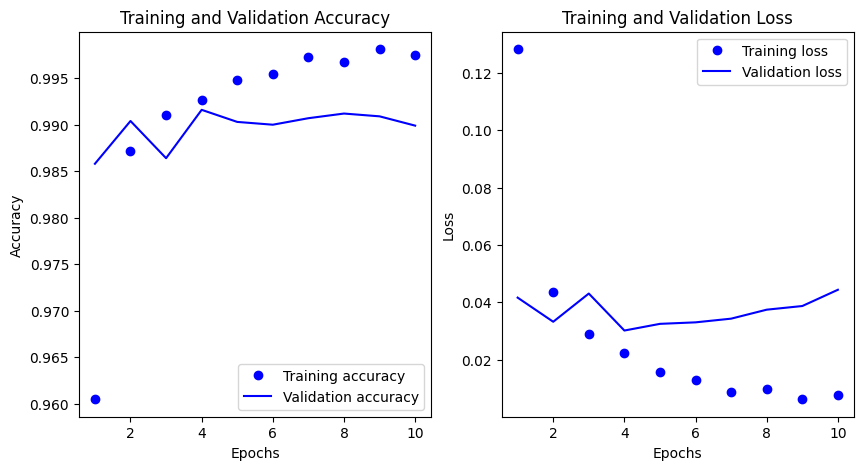

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Display the plots
plt.show()

# Experiment 6

**Apply Preprocessing Techniques and LSTM on the Dataset**

In [ ]:
import tensorflow
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report

In [ ]:
# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [ ]:
# Pad sequences
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))  # Removed input_length
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 897s 3s/step - accuracy: 0.7171 - loss: 0.5359 - val_accuracy: 0.8750 - val_loss: 0.3060
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 911s 3s/step - accuracy: 0.8942 - loss: 0.2818 - val_accuracy: 0.8572 - val_loss: 0.3400
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 870s 3s/step - accuracy: 0.9091 - loss: 0.2388 - val_accuracy: 0.8764 - val_loss: 0.3561
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 890s 3s/step - accuracy: 0.9395 - loss: 0.1715 - val_accuracy: 0.8778 - val_loss: 0.3511
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 886s 3s/step - accuracy: 0.9631 - loss: 0.1065 - val_accuracy: 0.8670 - val_loss: 0.4380


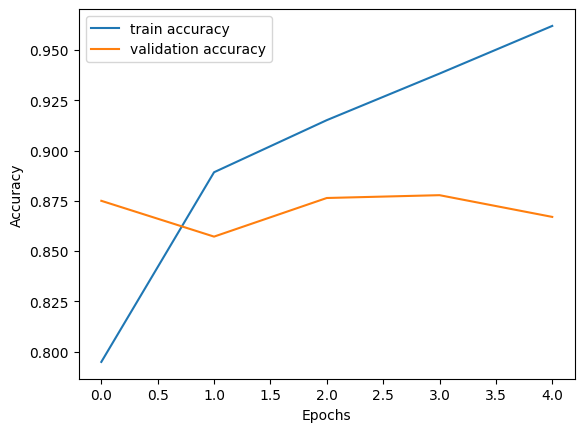

In [ ]:
# Example of using history to plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 441s 563ms/step


In [ ]:
# Classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     12500
           1       0.89      0.81      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



**Perform LSTM Hyperparameter Tuning to Improve Accuracy Score**

In [ ]:
import numpy as np
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))  # Removed input_length argument

In [ ]:
# First LSTM layer (Bidirectional)
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(0.2))

In [ ]:
# Second LSTM layer (Bidirectional)
model.add(Bidirectional(LSTM(units=100)))
model.add(Dropout(0.2))

In [ ]:
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1925s 6s/step - accuracy: 0.7177 - loss: 0.5276 - val_accuracy: 0.7946 - val_loss: 0.5819
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1915s 6s/step - accuracy: 0.8757 - loss: 0.3274 - val_accuracy: 0.8708 - val_loss: 0.3198
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1948s 6s/step - accuracy: 0.9306 - loss: 0.1888 - val_accuracy: 0.8712 - val_loss: 0.3196
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1947s 6s/step - accuracy: 0.9595 - loss: 0.1245 - val_accuracy: 0.8640 - val_loss: 0.4313
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1924s 6s/step - accuracy: 0.9644 - loss: 0.1069 - val_accuracy: 0.8130 - val_loss: 0.5027


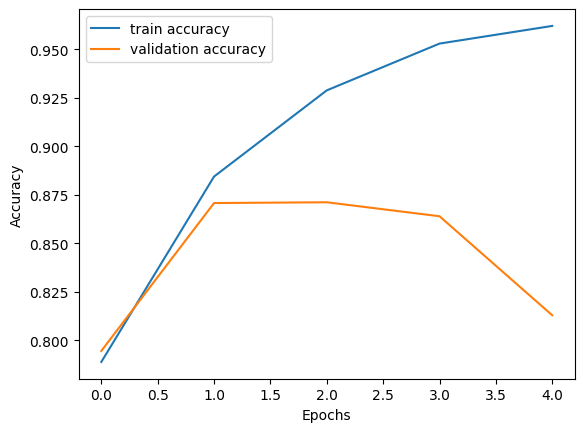

In [ ]:
# Example of using history to plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 750s 957ms/step


In [ ]:
# Classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     12500
           1       0.87      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



**Show How LSTM Model Compares to Built-in Classifier Provided by TextBlob**

**(i) LSTM Model**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Sample training data for reference
x_train = ["I love this movie", "This movie was terrible", "Best movie ever", "Worst movie ever"]

In [ ]:
# Initialize tokenizer and fit it on training data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)

In [ ]:
# Assuming max_length is the same as used during training
max_length = 10

In [ ]:
# Function to predict sentiment
def predict_sentiment(review, model, tokenizer, max_length):
    review_seq = tokenizer.texts_to_sequences([review])
    review_pad = pad_sequences(review_seq, maxlen=max_length, padding='post')
    prediction = model.predict(review_pad)
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    return sentiment

In [ ]:
# Input a review to test the model
sample_review = input("Enter a review to test the model: ")
predicted_sentiment = predict_sentiment(sample_review, model, tokenizer, max_length)
print(f"Predicted Sentiment: {predicted_sentiment}")

Enter a review to test the model: This movie is the greatest of all time to be honest as it creates unity among us as Indians!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Sentiment: Positive


**(ii) Built-in Classifier Provided by TextBlob**

In [ ]:
from textblob import TextBlob
# Function to analyze sentiment and provide interpretation
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    # Determine sentiment interpretation
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    # Determine subjectivity interpretation
    if subjectivity > 0.5:
        objectivity = "Subjective"
    else:
        objectivity = "Objective"
    return polarity, subjectivity, sentiment, objectivity

In [ ]:
# Function to analyze user-input review
def user_input_review():
    user_review = input("Enter your review: ")
    polarity, subjectivity, sentiment, objectivity = analyze_sentiment(user_review)
    print(f"Review: {user_review}")
    print(f"Polarity: {polarity}, Subjectivity: {subjectivity}")
    print(f"Sentiment: {sentiment}, Objectivity: {objectivity}")
    print()

In [ ]:
user_input_review()

Enter your review: This movie was the worst. I can't believe I wasted my money for this shit!
Review: This movie was the worst. I can't believe I wasted my money for this shit!
Polarity: -0.48333333333333334, Subjectivity: 0.6
Sentiment: Negative, Objectivity: Subjective



# Experiment 7

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=361b2ab1b296eb1d00a24a3fe76fbb4666a51ed661e1ebcba55cbc4559019c83
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
# Load dataset
data = pd.read_csv('/content/Credit_Card_Applications.csv')

In [ ]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
# Preprocess data (drop irrelevant columns and normalize)
data = data.drop(columns=['CustomerID', 'Class'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Initialize and train SOM
som = MiniSom(x=15, y=15, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_scaled)
som.train_random(data_scaled, num_iteration=100)

In [ ]:
# Create a grid to count fraud and non-fraud applications
fraud = pd.read_csv('/content/Credit_Card_Applications.csv')['Class']
fraud_count = np.zeros((15, 15))
total_count = np.zeros((15, 15))

In [ ]:
# Count the number of fraud and total applications at each neuron
for i, x in enumerate(data_scaled):
    w = som.winner(x)
    total_count[w] += 1
    if fraud.iloc[i] == 1:  # Fraud
        fraud_count[w] += 1

In [ ]:
# Calculate probabilities, handling division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    prob_fraud = np.where(total_count > 0, fraud_count / total_count, 0)  # Set to 0 where total_count is 0

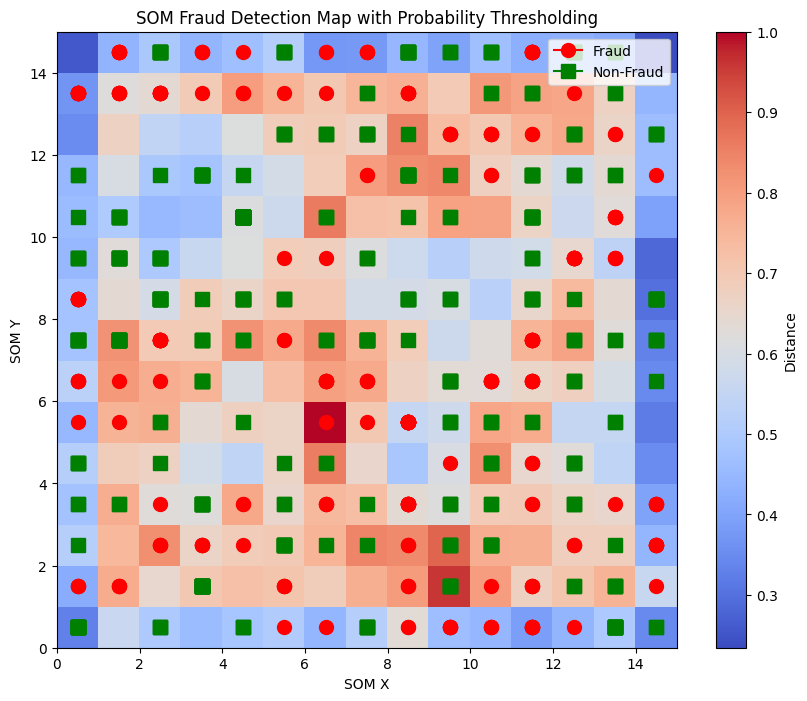

In [ ]:
# Visualize SOM (distance map)
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar(label='Distance')
# Define markers and colors
markers = ['o', 's']  # 'o' for fraud, 's' for non-fraud
colors = ['r', 'g']  # 'r' for fraud, 'g' for non-fraud
# Plot markers for fraud and non-fraud
for i, x in enumerate(data_scaled):
    w = som.winner(x)
    prob = prob_fraud[w]
    if prob > 0.5:  # Fraudulent application
        plt.plot(w[0] + 0.5, w[1] + 0.5, markers[0], color=colors[0], markersize=10)  # Fill color
    else:  # Non-fraudulent application
        plt.plot(w[0] + 0.5, w[1] + 0.5, markers[1], color=colors[1], markersize=10)  # Fill color
# Add legend for both classes manually
plt.plot([], [], marker='o', color='r', markersize=10, label='Fraud')  # Filled legend entry for Fraud
plt.plot([], [], marker='s', color='g', markersize=10, label='Non-Fraud')  # Filled legend entry for Non-Fraud
# Add legend and titles
plt.legend(loc='upper right', fontsize='medium')
plt.title('SOM Fraud Detection Map with Probability Thresholding')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.show()

In [ ]:
# Detect frauds (outliers) based on threshold in distance map
bmu_indices = np.array([som.winner(x) for x in data_scaled])
fraud_map = som.distance_map().T
threshold = np.mean(fraud_map) + np.std(fraud_map)
detected_frauds = np.array([1 if fraud_map[bmu[0], bmu[1]] > threshold else 0 for bmu in bmu_indices])

In [ ]:
# Print detected frauds and performance metrics
print("Detected frauds (1 indicates fraud, 0 indicates non-fraud):")
print(detected_frauds)

Detected frauds (1 indicates fraud, 0 indicates non-fraud):
[1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0

In [ ]:
print(classification_report(fraud, detected_frauds))

              precision    recall  f1-score   support

           0       0.53      0.73      0.61       383
           1       0.36      0.19      0.25       307

    accuracy                           0.49       690
   macro avg       0.45      0.46      0.43       690
weighted avg       0.46      0.49      0.45       690



# Experiment 8

In [ ]:
import keras
import pickle
import pandas as pd
import numpy as np
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.optimizers import Adam
from sklearn import datasets, decomposition

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
RANDOM_SEED=37117
np.random.seed(RANDOM_SEED)

In [ ]:
iris=datasets.load_iris()

In [ ]:
X=iris.data
y=iris.target
print("X:",X[0])
target_names=iris.target_names

X: [5.1 3.5 1.4 0.2]


In [ ]:
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [ ]:
def plot3clusters(X,title,vtitle):
 plt.figure()
 colors=['navy','turquoise','darkorange']
 lw=2
 for color,i,target_name in zip(colors,[0,1,2],target_names):
  plt.scatter(X[y==i,0],X[y==i,1],color=color,alpha=1.,lw=lw,label=target_name)
  plt.legend(loc='best',shadow=False,scatterpoints=1)
  plt.title(title)
  plt.xlabel(vtitle+"1")
  plt.ylabel(vtitle+"2")
  plt.show()

pca_transformed:  [-0.63070293  0.10757791  0.0187191  -0.00730695]


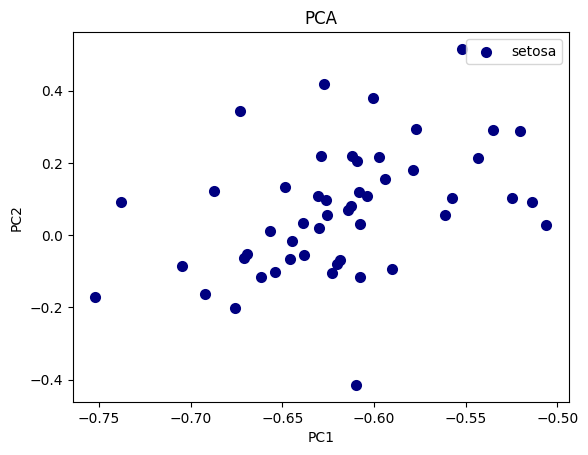

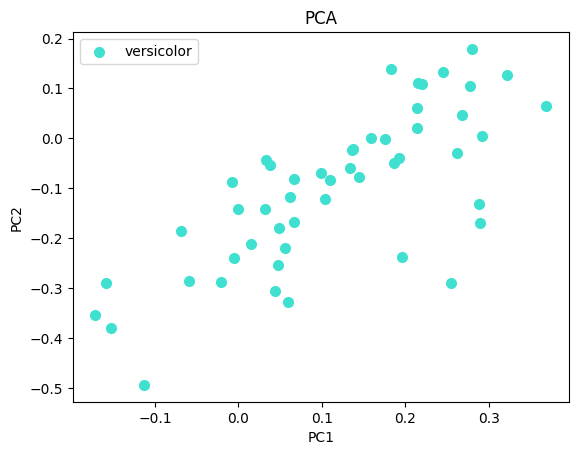

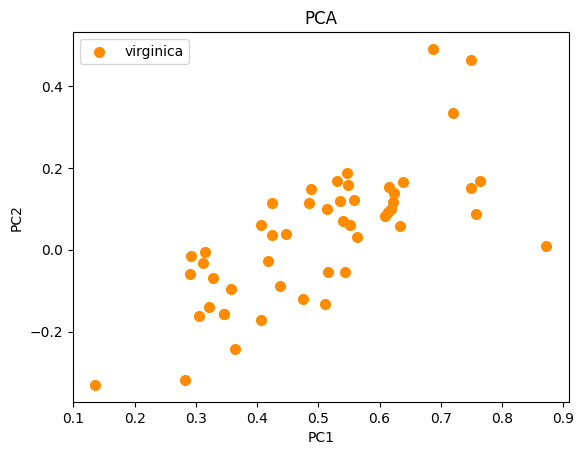

In [ ]:
pca=decomposition.PCA()
pca_transformed=pca.fit_transform(X_scaled)
print("pca_transformed: ",pca_transformed[0])
plot3clusters(pca_transformed[:,:2],'PCA','PC')

In [ ]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim=X_scaled.shape[1]
encoding_dim=2
input_img=Input(shape=(input_dim,))
encoded=Dense(encoding_dim,activation='linear')(input_img)
decoded=Dense(input_dim,activation='linear')(encoded)
autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='mse')
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


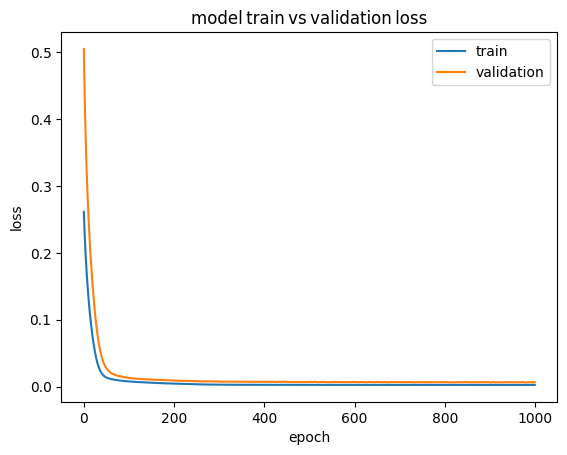

In [ ]:
history=autoencoder.fit(X_scaled,X_scaled,epochs=1000,batch_size=16,shuffle=True,validation_split=0.1,verbose=0)
#plot our loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.show()

5/5 [==============================] - 0s 1ms/step


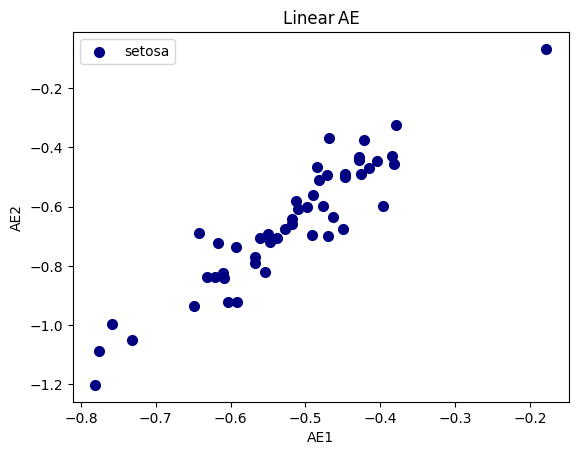

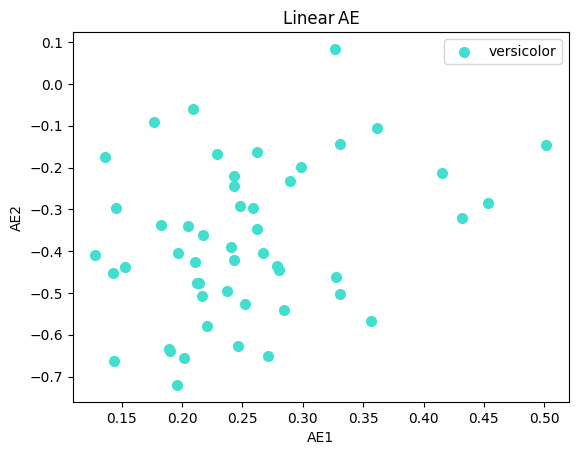

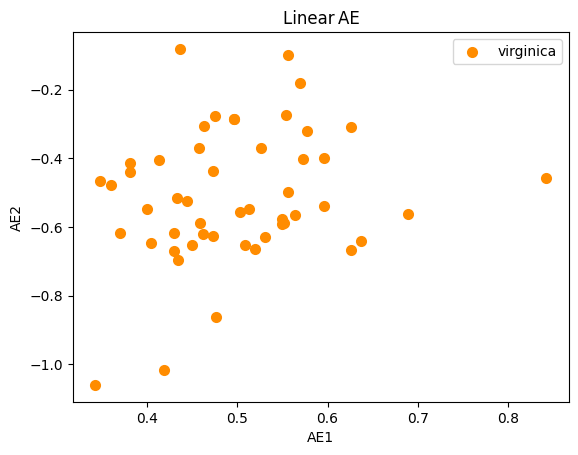

In [ ]:
# use our encoded layer to encode the training input
encoder=Model(input_img,encoded)
encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))
encoded_data=encoder.predict(X_scaled)
plot3clusters(encoded_data[:,:2],'Linear AE','AE')

In [ ]:
labels_true=y
titles=['PCA','Linear AE']

In [ ]:
for n_clusters_ in [2]:
 estimators=[('PCA',KMeans(n_clusters=n_clusters_),pca_transformed),('AE linear',KMeans(n_clusters=n_clusters_),encoded_data)]
 print(type(y))
for name,est,data in estimators:
 X=data
 est.fit(X)
 labels=est.labels_
 print(name,':')
 print(labels[:])
 print('Estimated number of clusters: %d'%n_clusters_)
 print("Homogeneity: %0.3f"%metrics.homogeneity_score(labels_true,labels))
 print("Completeness: %0.3f"%metrics.completeness_score(labels_true,labels))
 print("V-measure: %0.3f"%metrics.v_measure_score(labels_true,labels))
 print("Adjusted Rand Index: %0.3f"%metrics.adjusted_rand_score(labels_true,labels))
 print("Adjusted Mutual Information: %0.3f"%metrics.adjusted_mutual_info_score(labels_true,labels))
 print("Silhouette Coefficient: %0.3f"%metrics.silhouette_score(X,labels))
print('----------------------------------------------------------------------------------')

<class 'numpy.ndarray'>
PCA :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Estimated number of clusters: 2
Homogeneity: 0.579
Completeness: 1.000
V-measure: 0.734
Adjusted Rand Index: 0.568
Adjusted Mutual Information: 0.732
Silhouette Coefficient: 0.630
AE linear :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Estimated number of clusters: 2
Homogeneity: 0.545
Completeness: 0.948
V-measure: 0.692
Adjusted Rand Index: 0.544
Adjusted Mutual Information: 0.690
Silhouette Coeff

In [ ]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim2=X_scaled.shape[1]
encoding_dim2=2
input_img2=Input(shape=(input_dim2,))
encoded2=Dense(encoding_dim2,activation='sigmoid')(input_img2)
decoded2=Dense(input_dim2,activation='sigmoid')(encoded2)
autoencoder2=Model(input_img2,decoded2)
autoencoder2.compile(optimizer='adam',loss='mse')
print(autoencoder2.summary())
history2=autoencoder2.fit(X_scaled,X_scaled,epochs=2000,batch_size=16,shuffle=True,validation_split=0.1,verbose=0)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


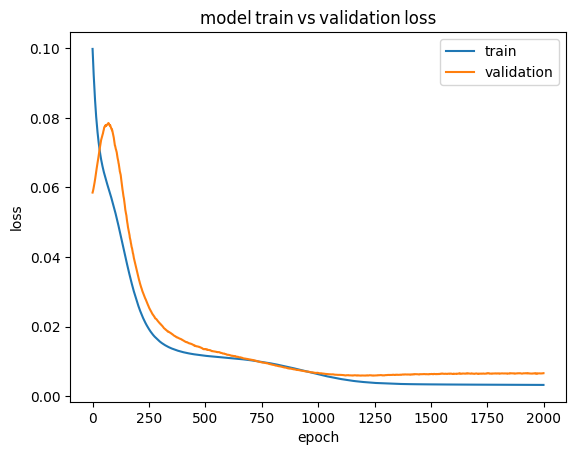

In [ ]:
#plot our loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.show()

5/5 [==============================] - 0s 1ms/step


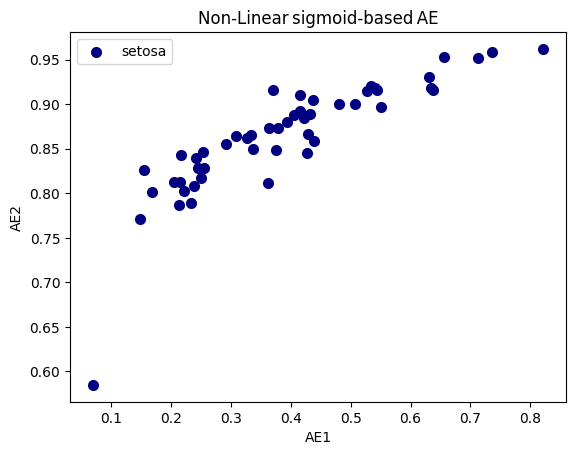

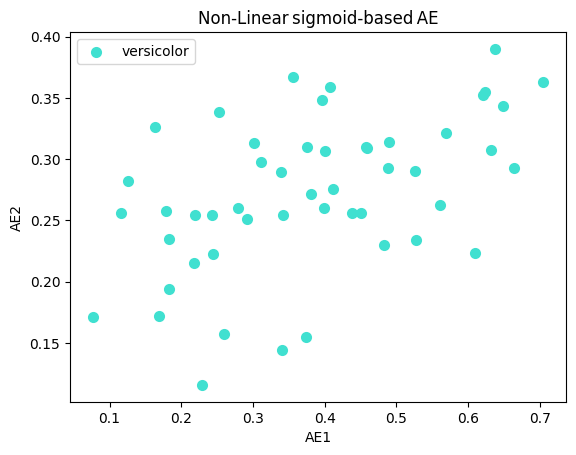

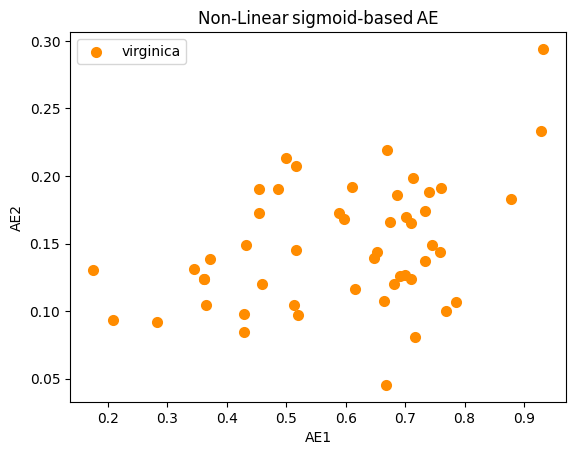

In [ ]:
# use our encoded layer to encode the training input
encoder2=Model(input_img2,encoded2)
encoded_input2=Input(shape=(encoding_dim2,))
decoder_layer2=autoencoder2.layers[-1]
decoder2=Model(encoded_input2,decoder_layer2(encoded_input2))
encoded_data2=encoder2.predict(X_scaled)
plot3clusters(encoded_data2[:,:2],'Non-Linear sigmoid-based AE','AE')

In [ ]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim3=X_scaled.shape[1]
encoding_dim3=2
input_img3=Input(shape=(input_dim3,))
encoded3=Dense(encoding_dim3,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img3)
decoded3=Dense(input_dim3,activation='sigmoid')(encoded3)
autoencoder3=Model(input_img3,decoded3)
autoencoder3.compile(optimizer='adam',loss='mse')
print(autoencoder3.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


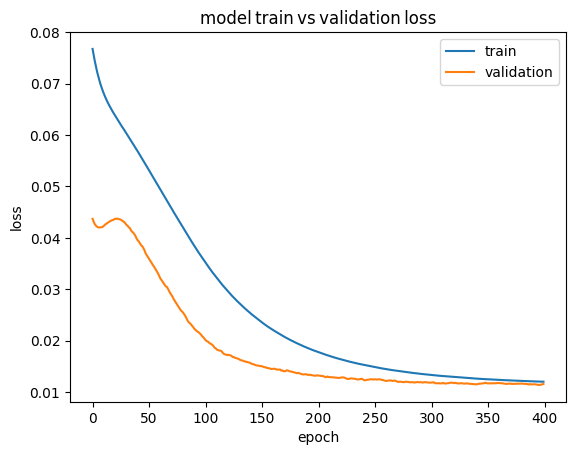

In [ ]:
history3=autoencoder3.fit(X_scaled,X_scaled,epochs=400,batch_size=16,shuffle=True,validation_split=0.1,verbose=0)
#plot our loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.show()

5/5 [==============================] - 0s 1ms/step


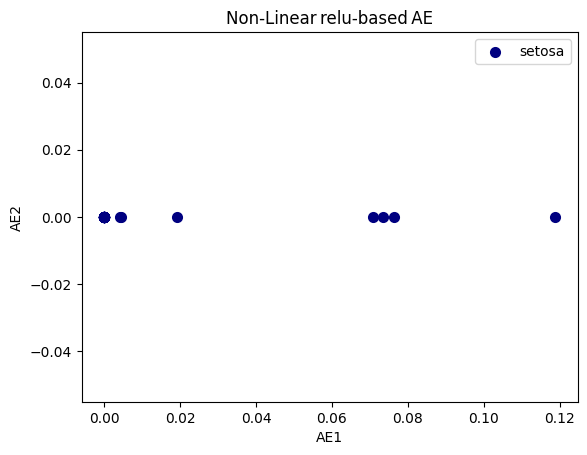

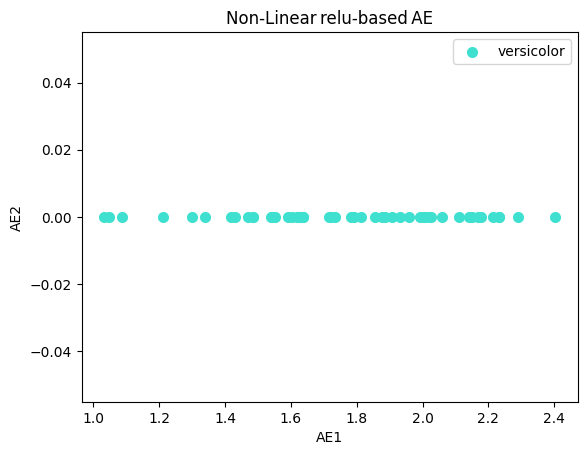

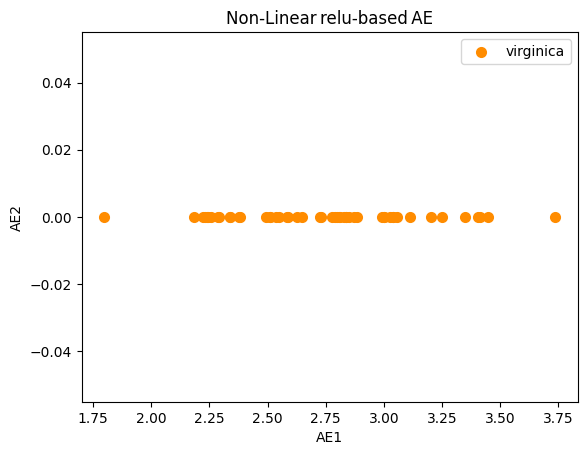

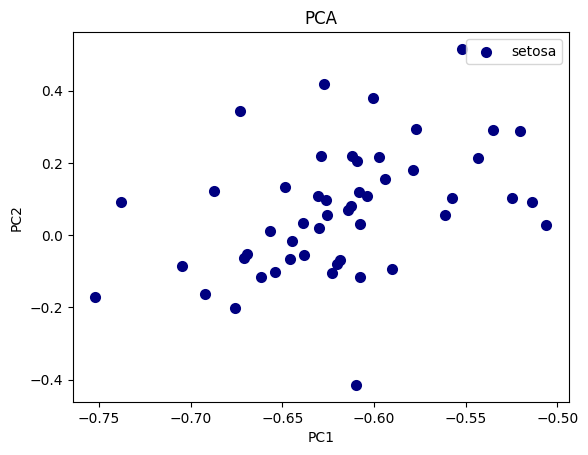

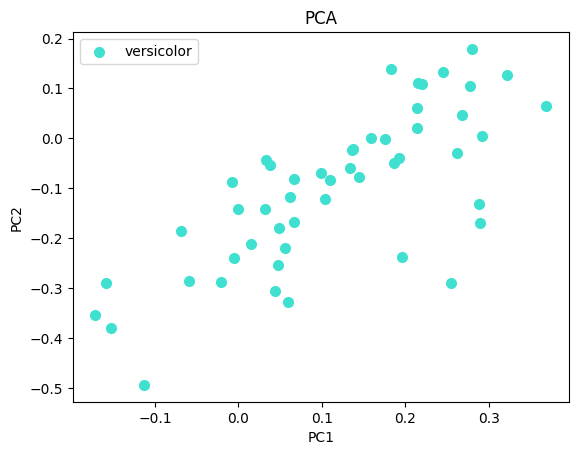

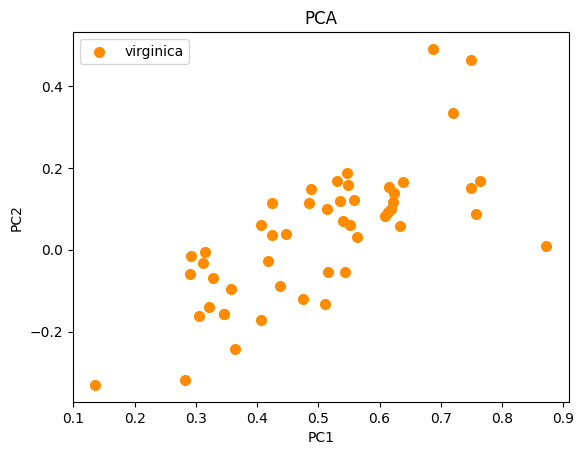

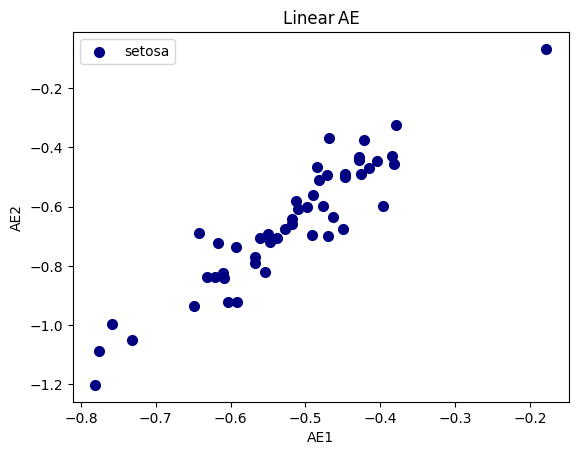

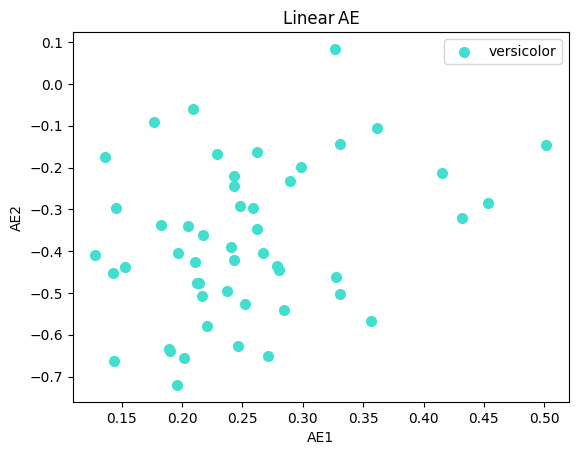

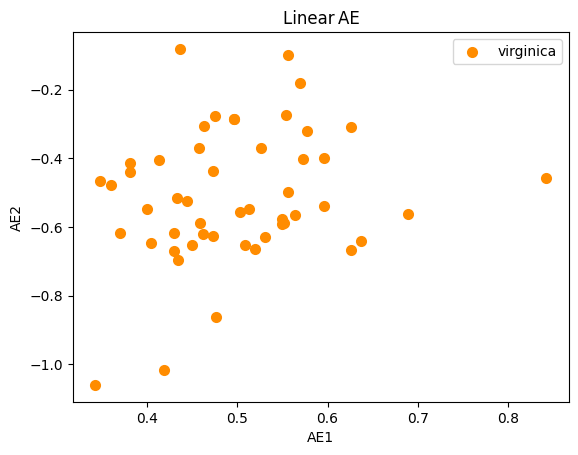

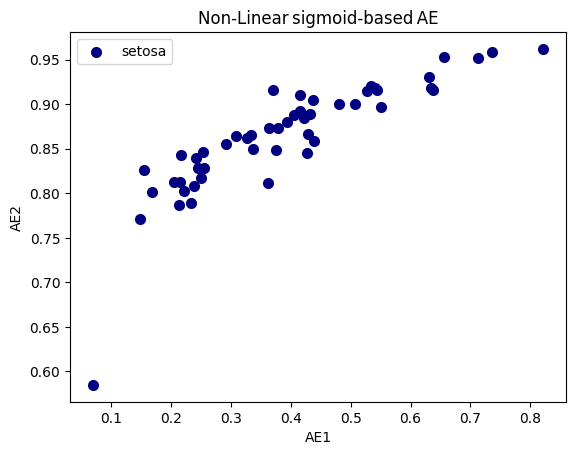

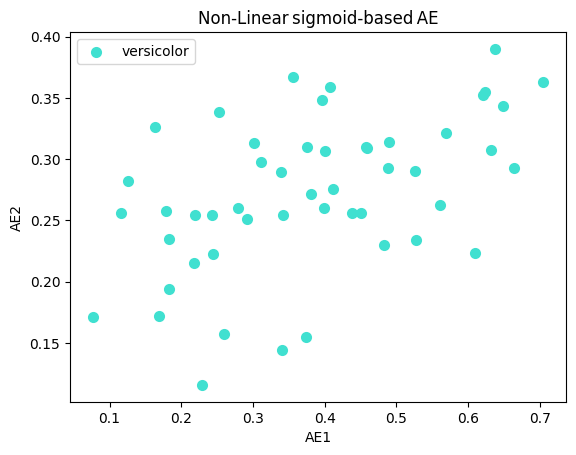

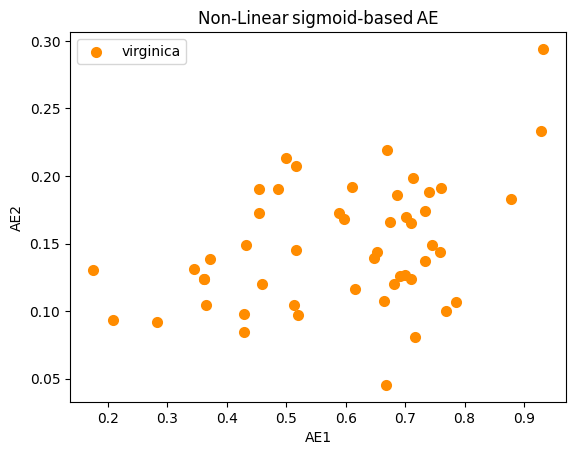

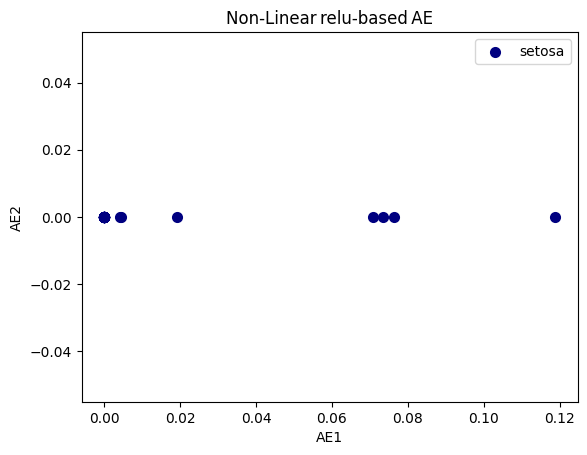

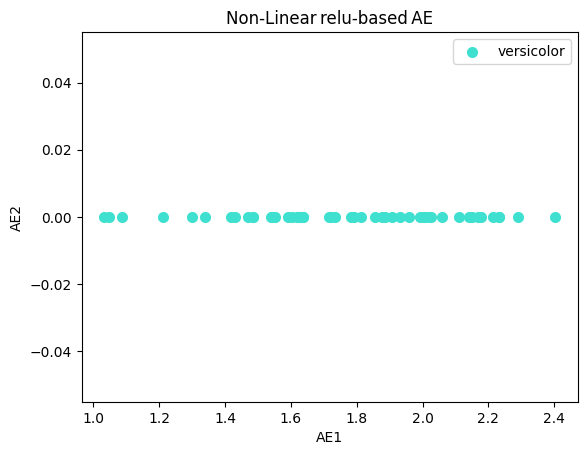

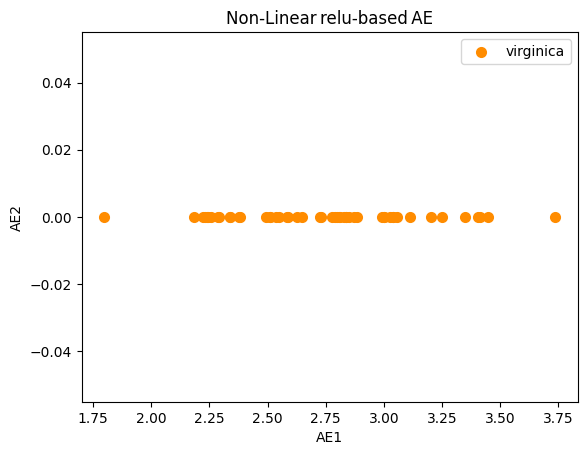

In [ ]:
# use our encoded layer to encode the training input
encoder3=Model(input_img3,encoded3)
encoded_input3=Input(shape=(encoding_dim3,))
decoder_layer3=autoencoder3.layers[-1]
decoder3=Model(encoded_input3,decoder_layer3(encoded_input3))
encoded_data3=encoder3.predict(X_scaled)
plot3clusters(encoded_data3[:,:2],'Non-Linear relu-based AE','AE')
plot3clusters(pca_transformed[:,:2],'PCA','PC')
plot3clusters(encoded_data[:,:2],'Linear AE','AE')
plot3clusters(encoded_data2[:,:2],'Non-Linear sigmoid-based AE','AE')
plot3clusters(encoded_data3[:,:2],'Non-Linear relu-based AE','AE')

# Experiment 10

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras import layers, models

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Resize images to the required input size of the chosen pre-trained model
target_size = (64,64)
batch_size = 8

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# 4. Define a generator function for resizing
def resize_generator(data,target_size,batch_size):
  for i in range(0, len(data), batch_size):
    batch = data[i:i+batch_size]
    resized_batch = np.array([tf.image.resize(img, target_size).numpy() for img in batch])
    yield np.array(resized_batch)

In [ ]:
# 5. Use the generator to process one batch at a time and resize the CIFAR-10 images
x_train_resized = np.concatenate([batch for batch in resize_generator(x_train,target_size,batch_size)],axis=0)
x_test_resized = np.concatenate([batch for batch in resize_generator(x_test,target_size,batch_size)],axis=0)

In [ ]:
print(x_train_resized.shape)
print(x_test_resized.shape)

(50000, 64, 64, 3)
(10000, 64, 64, 3)


In [ ]:
# 6. Load models with pre-trained ImageNet weights (without top layer)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 8. Compile the models for evaluation (dummy compilation for demonstration)
for model in [vgg16_model, resnet_model, inception_model]:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# For now we simulate the results
model_names = ['VGG16', 'ResNet50', 'InceptionV3']
accuracy_scores = [0.85,0.9,0.88]
loss_scores = [0.55,0.5,0.52]

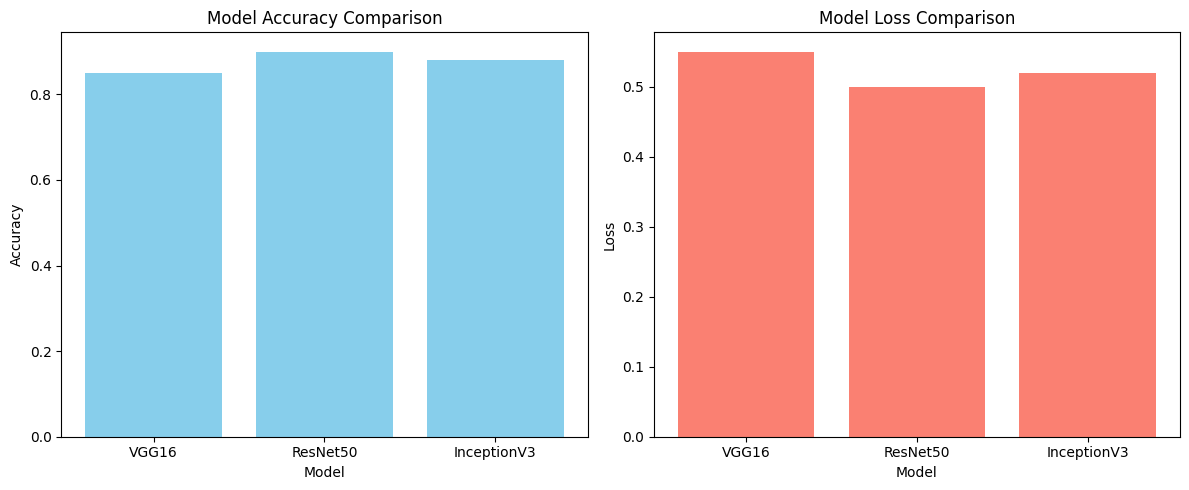

In [ ]:
# 10. plot the results
plt.figure(figsize=(12, 5))
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
# Loss plot
plt.subplot(1, 2, 2)
plt.bar(model_names, loss_scores, color='salmon')
plt.title('Model Loss Comparison')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()